# Python Projekt 2.0

In [71]:
#import aller Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msno
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression, LogisticRegression 
from IPython.display import display
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [72]:
#Startzeit der Investigation
import datetime as dt 
start_time = dt.datetime.now()
print('Investigation started at: {}'.format(start_time))

Investigation started at: 2024-01-04 10:31:30.049807


In [73]:
#alle Datensätze importieren
df_cust = pd.read_csv("/Users/noahbonekamp/Desktop/kunden.csv", sep=";")
df_vis = pd.read_csv("/Users/noahbonekamp/Desktop/besucher copy.csv", sep=";", decimal='.')
df_geo = pd.read_csv("/Users/noahbonekamp/Desktop/geo_test.csv", delimiter=";")

In [74]:
df_geo['Niederlassung']= df_geo['Niederlassung'].astype(str)
df_geo['Niederlassung'] = df_geo['Niederlassung'].str.title()
#Data Cleaning um nur noch die Bundesländer zu zeigen
mapping = {
    'Berlin-Mitte': 'Berlin',
    'Berlin-Charlottenburg': 'Berlin',
    'Nrw': 'Nordrhein-Westfalen',
    'Düsseldorf': 'Nordrhein-Westfalen'
}
df_geo['Niederlassung'] = df_geo['Niederlassung'].replace(mapping, regex=True)

In [75]:
#zusammenführen der geodaten
cust_m = pd.merge(df_cust, df_geo, how='left', on='KundeNr')
vis_m = pd.merge(df_vis, df_geo, how='left', on='KundeNr')
cust_m_copy = cust_m.copy()

In [76]:
uniques = list(df_geo['Niederlassung'].unique())
print(uniques)
n_unique = df_geo['Niederlassung'].nunique()
print(f'Wir haben Kunden aus {n_unique} Bundesländern')
#Kunden sind aus 10 Bundesländern vertreten 

['Sachsen', 'Nordrhein-Westfalen', 'Hessen', 'Bayern', 'Baden-Württemberg', 'Berlin', 'Niedersachsen', 'Brandenburg', 'Thüringen', 'Hamburg']
Wir haben Kunden aus 10 Bundesländern


In [77]:
#index setzen auf die Kundennummer
cust_m.set_index('KundeNr', inplace=True)
vis_m.set_index('KundeNr', inplace=True)

In [78]:
cust_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104 entries, K0310 to K0861
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alter          1104 non-null   int64  
 1   Einkommen      1104 non-null   object 
 2   Preis          1104 non-null   float64
 3   Geschlecht     1099 non-null   float64
 4   Zeit           1104 non-null   float64
 5   Niederlassung  1104 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 60.4+ KB


In [79]:
cust_m.head(5)

,Alter,Einkommen,Preis,Geschlecht,Zeit,Niederlassung
KundeNr,,,,,,
K0310,64,66894.0,88160.31,1.0,43.0,Bayern
K1042,54,77644.0,103145.70,1.0,40.0,Berlin
K0382,55,44341.0,80565.16,0.0,37.0,Baden-Württemberg
K0498,49,67271.0,83949.89,0.0,42.0,Bayern
K0552,46,49832.0,93781.58,0.0,41.0,Hessen


In [80]:
#Angenehmere Ansicht mit T = transpose 
cust_m.describe().T

,count,mean,std,min,25%,50%,75%,max
Alter,1104.0,50.481884,12.225059,30.00,40.0000,51.000,61.000,120.00
Preis,1104.0,88975.198714,24464.067781,21471.65,70609.4225,88931.455,107093.375,165482.31
Geschlecht,1099.0,0.637853,0.480840,0.00,0.0000,1.000,1.000,1.00
Zeit,1104.0,44.375906,10.848040,12.00,37.0000,44.000,52.000,80.00


In [81]:
vis_m.describe().T

,count,mean,std,min,25%,50%,75%,max
Alter,891.0,49.881033,11.865889,30.00,40.00,49.00,60.00,70.00
Einkommen,891.0,59367.936061,16164.358281,10802.03,47816.61,59163.82,71001.38,108569.09
Geschlecht,891.0,0.578002,0.494156,0.00,0.00,1.00,1.00,1.00
Zeit,891.0,35.166105,10.476802,3.00,28.00,35.00,43.00,68.00


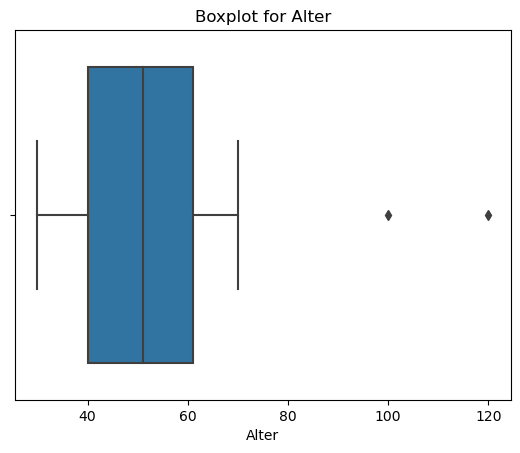

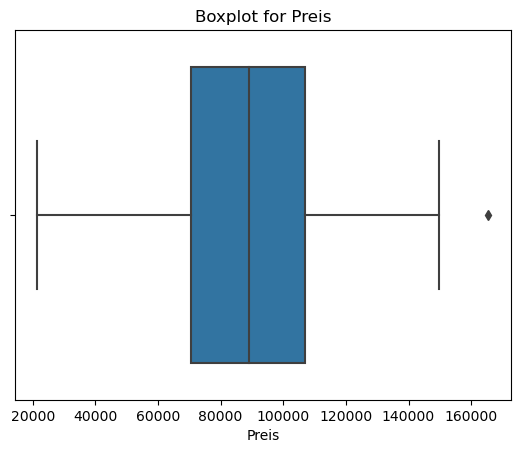

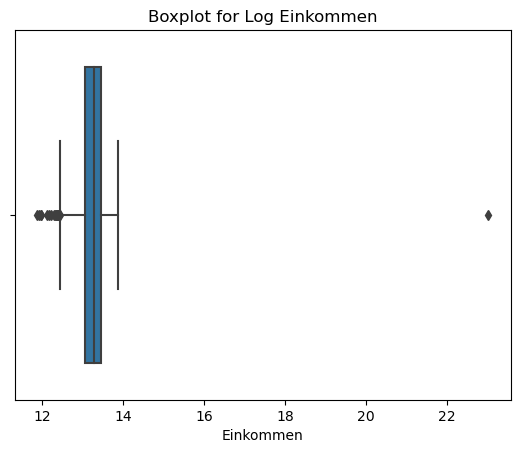

In [82]:
#Erstellung von Boxplots für alle numerischen Spalten, um Outlier Detection zu visualisieren 
numeric_cols = ['Alter', 'Preis']
for column in numeric_cols:
    sns.boxplot(x=cust_m[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

# Deutscher Datensatz ('Änderung der Punktierung')
temp_cust_m = cust_m.copy()
temp_cust_m['Einkommen'] = temp_cust_m['Einkommen'].str.replace('.', '').astype(float)

# Log transformation, da Outlier zu groß 
temp_cust_m['Einkommen'] = np.log(temp_cust_m['Einkommen'])

# Boxplot for Log Einkommen
sns.boxplot(x=temp_cust_m['Einkommen'])
plt.title('Boxplot for Log Einkommen')
plt.show()
warnings.filterwarnings("default") 

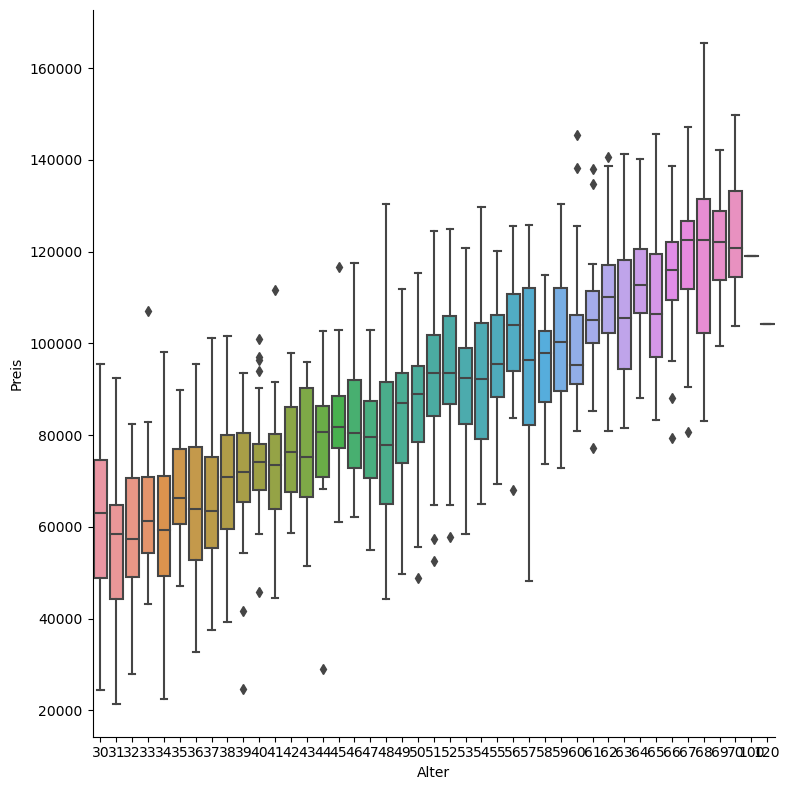

In [83]:
#Visualisierung von Preis gegen Alter um zu zeigen, wo genau in dem Datensatz Abweichungen erwartet sind 
sns.catplot(x='Alter', y='Preis', data=cust_m, kind='box', height=8)

In [84]:
# Änderung von Spalte Einkommen und Spalte Alter zu float 
cust_m['Einkommen'] = pd.to_numeric(cust_m['Einkommen'], errors='coerce')
cust_m['Alter'] = pd.to_numeric(cust_m['Alter'], errors='coerce')
cust_m = cust_m.dropna(subset=['Einkommen', 'Alter'])

# Outlier entfernen 'Einkommen'
Q1 = cust_m['Einkommen'].quantile(0.25)
Q3 = cust_m['Einkommen'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cust_m = cust_m[(cust_m['Einkommen'] >= lower_bound) & (cust_m['Einkommen'] < upper_bound)]

# Outlier entfernen 'Alter'
Q1_Alter = cust_m['Alter'].quantile(0.25)
Q3_Alter = cust_m['Alter'].quantile(0.75)
IQR_Alter = Q3_Alter - Q1_Alter

lower_bound_Alter = Q1_Alter - 1.5 * IQR_Alter
upper_bound_Alter = Q3_Alter + 1.5 * IQR_Alter

cust_m = cust_m[(cust_m['Alter'] >= lower_bound_Alter) & (cust_m['Alter'] < upper_bound_Alter)]
#Reduktion des Df um 11 Zeilen 

In [85]:
cust_m.head(5)

,Alter,Einkommen,Preis,Geschlecht,Zeit,Niederlassung
KundeNr,,,,,,
K0310,64,66894.0,88160.31,1.0,43.0,Bayern
K1042,54,77644.0,103145.70,1.0,40.0,Berlin
K0382,55,44341.0,80565.16,0.0,37.0,Baden-Württemberg
K0498,49,67271.0,83949.89,0.0,42.0,Bayern
K0552,46,49832.0,93781.58,0.0,41.0,Hessen


In [86]:
mean_v = cust_m['Preis'].mean()
max_v = cust_m['Preis'].max()
min_v = cust_m['Preis'].min()
Total = cust_m['Preis'].sum()
total_sold = cust_m_copy.index.nunique()

mean_values = round(mean_v, 2)
max_values = round(max_v, 2)
min_values = round(min_v,2)
total_value = round(Total, 2)

#Euro anzeigen lassen vor den Values
table = pd.DataFrame({
    'Anzahl verkaufter Fzg.': [total_sold],
    'Durchschnitt': ['{:,.2f}€'.format(mean_values)],
    'Maximaler Preis': ['{:,.2f}€'.format(max_values)],
    'Minimaler Preis': ['{:,.2f}€'.format(min_values)],
    'Gesamtumsatz': ['{:,.2f}€'.format(total_value)]
}, index=None)  
display(table)

,Anzahl verkaufter Fzg.,Durchschnitt,Maximaler Preis,Minimaler Preis,Gesamtumsatz
0,1104,"88,829.33€","149,827.25€","21,471.65€","97,534,601.41€"


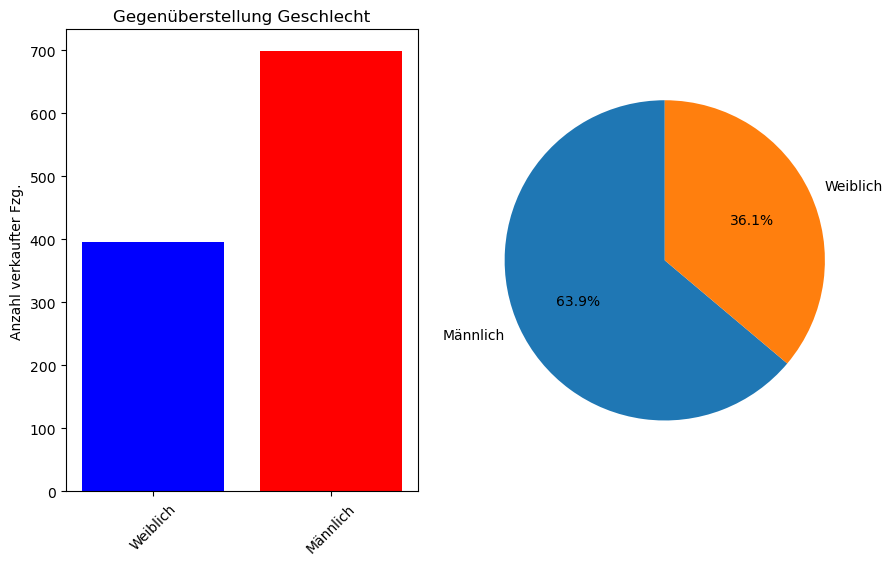

In [87]:
#Geschlechterverteilung beim Kauf von Autos 
var = cust_m['Geschlecht'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.bar(var.index, var, color=['red', 'blue'])
ax1.set_ylabel('Anzahl verkaufter Fzg.')
ax1.set_title('Gegenüberstellung Geschlecht')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Weiblich', 'Männlich'], rotation=45)

labels = {1.0: 'Männlich', 0.0: 'Weiblich'}

var2 = cust_m['Geschlecht'].value_counts()
ax2.pie(var2, labels=labels.values(), autopct='%1.1f%%', startangle=90)
ax2.axis('equal')

plt.show()


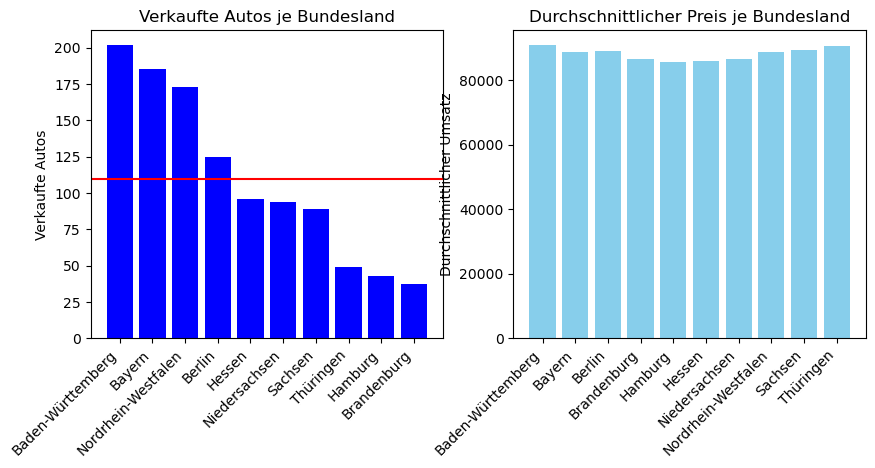

In [102]:
#Verkaufte Autos je Bundesland 
var = cust_m['Niederlassung'].value_counts()
mean_value = var.mean()

var2= cust_m.groupby('Niederlassung')['Preis'].agg('sum')

revenue = var2/var

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
ax1.bar(var.index, var.values, color='blue')
ax1.set_ylabel('Verkaufte Autos')
ax1.set_title('Verkaufte Autos je Bundesland')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.axhline(y=mean_value, color='red', linestyle='-')

ax2.bar(var2.index, revenue.values, color='skyblue')
ax2.set_ylabel('Durchschnittlicher Umsatz') 
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_title('Durchschnittlicher Preis je Bundesland')

plt.show()
warnings.filterwarnings("ignore") 

In [89]:
var = cust_m['Niederlassung'].value_counts()
display(var)

Baden-Württemberg      203
Bayern                 186
Nordrhein-Westfalen    174
Berlin                 126
Hessen                  96
Niedersachsen           95
Sachsen                 89
Thüringen               49
Hamburg                 43
Brandenburg             37
Name: Niederlassung, dtype: int64

In [90]:
var2= cust_m.groupby('Niederlassung')['Preis'].agg('sum')
print(var2)

Niederlassung
Baden-Württemberg      18451708.14
Bayern                 16552456.61
Berlin                 11287707.99
Brandenburg             3206924.71
Hamburg                 3678628.46
Hessen                  8243033.23
Niedersachsen           8278995.69
Nordrhein-Westfalen    15423611.69
Sachsen                 7961502.18
Thüringen               4450032.71
Name: Preis, dtype: float64


In [91]:
#KPI für den CEO
mean_cust = cust_m['Alter'].mean()
mean_vis = vis_m['Alter'].mean()
age_cust_m_mean = cust_m.groupby('Geschlecht')['Alter'].mean()
mean_cust_Einkommen = cust_m['Einkommen'].mean()
cust_credit = cust_m[cust_m['Preis'] >= cust_m['Einkommen']].value_counts().sum()
cust_credit_p = cust_credit/1093
cust_credit_op = 1093-1088
cust_credit_op_p = cust_credit_op/1093
table = pd.DataFrame({
    'Durschnittliches Alter Kunden': [round(mean_cust, 2)], 
    'Durschnittliches Alter Visitors': [round(mean_vis, 2)], 
    'Durchschnittliches Alter männlich (Kunden)': ['50.34'],
    'Durchschnittliches Alter weiblich (Kunden)': ['50.52'], 
    'Durchschnittliches Einkommen Kunden': ['{:,.2f}€'.format(mean_cust_Einkommen)], 
    'Anzahl Kunden mit Kreditaufnahme': [cust_credit], 
    '%-Verteilung Kredit': [cust_credit_p]
})
display(table.T)
    

,0
Durschnittliches Alter Kunden,50.32
Durschnittliches Alter Visitors,49.88
Durchschnittliches Alter männlich (Kunden),50.34
Durchschnittliches Alter weiblich (Kunden),50.52
Durchschnittliches Einkommen Kunden,"58,820.35€"
Anzahl Kunden mit Kreditaufnahme,1088
%-Verteilung Kredit,0.995425


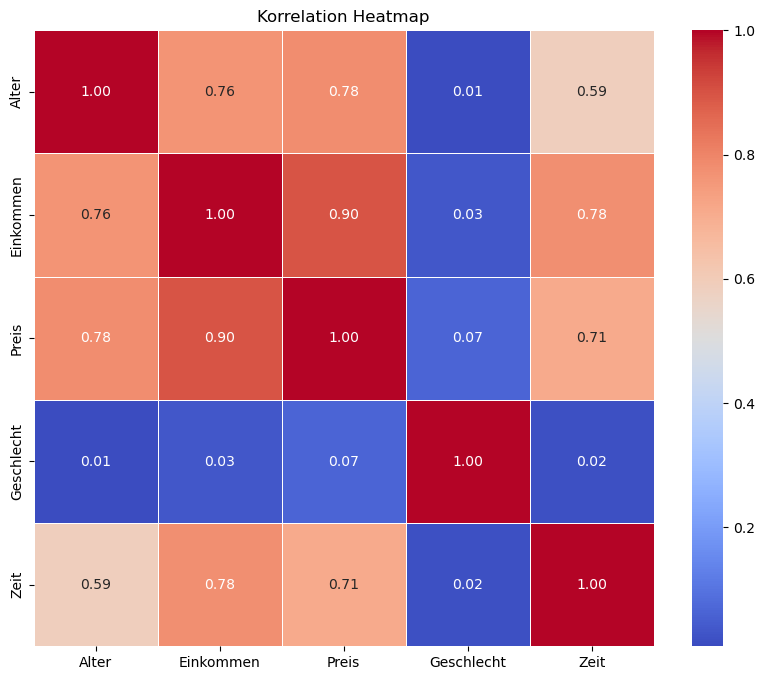

In [92]:
#Pearson-Korrelation gem. Heatmap 
correlation = cust_m.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korrelation Heatmap')
plt.show()
warnings.filterwarnings("ignore") 

Text(0, 0.5, 'Anzahl der Besichtigungen')

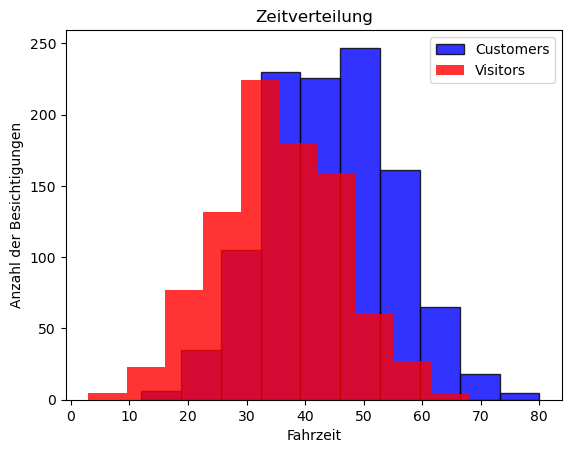

In [93]:
#Histogramverteilung von der gefahrenen Zeit 
time = cust_m['Zeit'].value_counts()
time_asc = sorted(cust_m['Zeit'], reverse=True)
time_asc_vis = sorted(vis_m['Zeit'], reverse=True)
number_bins = 10
a = 0.8
plt.hist(time_asc, bins = number_bins, color = 'blue', edgecolor = 'black', alpha = a, label = 'Customers')
plt.hist(time_asc_vis, bins = number_bins, color = 'red', alpha = a, label = 'Visitors')
plt.legend()
plt.title('Zeitverteilung')
plt.xlabel('Fahrzeit')
plt.ylabel('Anzahl der Besichtigungen')

In [94]:
#Prognosse absolute Zahlen Kaufpreis Kunde 1 und Kunde 2 
cust_m.dropna(inplace=True)
cust_m['Kauf'] = 1
X = cust_m[['Alter', 'Geschlecht', 'Einkommen']]
y= cust_m['Preis']
model = LinearRegression()
x = model.fit(X, y)
kunde_1 = [[32, 1.0, 30000]]
prognose_1 = x.predict(kunde_1)
kunde_2 = [[51, 1.0, 54000]]
prognose_2 = x.predict(kunde_2)
print(prognose_1)
print(prognose_2)
beta_price = model.coef_
print("Beta-Koeffizienten für Preisvorhersage:", beta_price)
warnings.filterwarnings("default") 

[50324.14218393]
[84813.9341628]
Beta-Koeffizienten für Preisvorhersage: [4.78444872e+02 2.06504030e+03 1.05830581e+00]


In [95]:
#Zusammenführung (Concatentation) von Datensätzen Besucher und Kunden um die Wahrscheinlichkeit zu berechnen. 
complete_df = pd.concat([cust_m, vis_m], ignore_index=True)
complete_df['Kauf'] = np.where(complete_df['Preis'].isna(), 0, 1)
complete_df['Preis'] = complete_df['Preis'].fillna(0)
print(complete_df['Einkommen'].isna().sum())
complete_df.head(5)
complete_df.info()

csv_file_path = '/Users/noahbonekamp/Desktop/df_final.csv'
complete_df.to_csv(csv_file_path, index=False)

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alter          1984 non-null   int64  
 1   Einkommen      1984 non-null   float64
 2   Preis          1984 non-null   float64
 3   Geschlecht     1984 non-null   float64
 4   Zeit           1984 non-null   float64
 5   Niederlassung  1984 non-null   object 
 6   Kauf           1984 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 108.6+ KB


In [103]:
#ML Logistic Regression Model mit sklearn. Datensatz scheint aber zu klein zu sein, damit die Maschine von einem Split Datensatz hier lernen kann und eine Prediction ausmachen kann. 
X_purchase = complete_df[['Alter', 'Geschlecht', 'Einkommen', 'Zeit']] 
y_purchase = complete_df['Kauf']
model_purchase = LogisticRegression()
model_purchase.fit(X_purchase, y_purchase)
# Beta-Koeffizienten für die Kaufvorhersage
beta_purchase = model_purchase.coef_
print("Beta-Koeffizienten für Kaufvorhersage:", beta_purchase)
# Wahrscheinlichkeitsvorhersage für Kauf
kunde_1_purchase = [[32, 1.0, 30000, 45]]
probability_1 = model_purchase.predict_proba(kunde_1_purchase)[:, 1] 
kunde_2_purchase = [[51, 1.0, 54000, 45]]
probability_2 = model_purchase.predict_proba(kunde_2_purchase)[:, 1]
print("Wahrscheinlichkeit Kunde 1 kauft:", probability_1)
print("Wahrscheinlichkeit Kunde 2 kauft:", probability_2)

Beta-Koeffizienten für Kaufvorhersage: [[-1.00597332e-02  4.98424971e-04 -3.94703287e-05  7.80769765e-02]]
Wahrscheinlichkeit Kunde 1 kauft: [0.88147699]
Wahrscheinlichkeit Kunde 2 kauft: [0.70434372]


In [97]:
import statsmodels.formula.api as smf 
reg = smf.logit('Kauf ~ Alter + Einkommen + Geschlecht + Zeit', data = complete_df).fit()

Optimization terminated successfully.
         Current function value: 0.580665
         Iterations 6


In [98]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Kauf   No. Observations:                 1984
Model:                          Logit   Df Residuals:                     1979
Method:                           MLE   Df Model:                            4
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.1560
Time:                        10:31:34   Log-Likelihood:                -1152.0
converged:                       True   LL-Null:                       -1364.9
Covariance Type:            nonrobust   LLR p-value:                 7.675e-91
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4148      0.264     -9.155      0.000      -2.932      -1.898
Alter          0.0180      0.007      2.616      0.009       0.005       0.031
Einkommen  -4.219e-05   5.45e-06     -7.742      0.000   -5.29e-05   -3.15e-05
Geschlecht     0.2429      0.103      2.357      0.018       0.041       0.445
Zeit           0.1016      0.006     17.419      0.000       0.090       0.113
==============================================================================
"""

In [99]:
#Prediction mit Logistic Regression using statmodels
new_data_cust_1 = pd.DataFrame({'Alter': [32], 'Einkommen': [30000], 'Geschlecht': [1.0], 'Zeit': [30]})
prediction = reg.predict(new_data_cust_1)
print(prediction*100)

new_data_cust_2 = pd.DataFrame({'Alter': [51], 'Einkommen':[54000], 'Geschlecht': [1.0], 'Zeit': [45]})
prediction_2 = reg.predict(new_data_cust_2)
print(prediction_2*100)

0    54.596122
dtype: float64
0    73.820666
dtype: float64


In [100]:
#Wie lange hat die Investigation gedauert. Ein wenig verzögert, da wir sie abschließend noch einmal final durgelaufen haben 
Investigation_Ende = dt.datetime.now()
investigation_time = Investigation_Ende - start_time
minutes = divmod(investigation_time.total_seconds(), 60)[0]
seconds = round(divmod(investigation_time.total_seconds(), 60)[1], 0) 
total = str(int(minutes)) + '.' + str(int(seconds))
print(f'EDA took {total} min. ')

EDA took 0.4 min. 
